# Model Evaluation

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [85]:
# Load results datasets
# This dataset combine X_test & y_true and y_pred from different models
chicago_predictions = pd.read_csv('chicago_predictions.csv')
nibrs_predictions = pd.read_csv('nibrs_predictions.csv')
combine_model_predictions = pd.read_csv('model_metrics_report.csv')

In [86]:
model_columns = ['CatBoost', 'RandomForest', 'LogisticRegression']

custom_palette_1 = sns.color_palette("husl", n_colors=len(model_columns))
custom_palette_2 = sns.color_palette("Set2", n_colors=len(model_columns))

In [87]:
# Check the columns of the datasets
chicago_predictions.columns

Index(['UNIFIED_LOCATION_CODE', 'month', 'day', 'hour', 'weekday',
       'is_weekend', 'is_holiday', 'crime_against', 'offense_category_name',
       'y_true', 'CatBoost', 'RandomForest', 'LogisticRegression'],
      dtype='object')

## Standard Classification Metrics

In [88]:
print("=="*10+"CatBoost"+"=="*10)
# CatBoost performance
print("Chicago Classification Report:\n", classification_report(chicago_predictions["y_true"], chicago_predictions["CatBoost"]))
print("NIBRS Classification Report:\n", classification_report(nibrs_predictions["y_true"], nibrs_predictions["CatBoost"]))


====================CatBoost====================
Chicago Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.81      0.88     78768
        True       0.34      0.71      0.46     10930

    accuracy                           0.80     89698
   macro avg       0.65      0.76      0.67     89698
weighted avg       0.88      0.80      0.83     89698

NIBRS Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.75      0.82    467171
        True       0.33      0.59      0.42     95805

    accuracy                           0.72    562976
   macro avg       0.61      0.67      0.62    562976
weighted avg       0.80      0.72      0.75    562976



In [89]:
print("=="*10+"Random Forest"+"=="*10)
# Random Forest performance
print("Chicago Classification Report:\n", classification_report(chicago_predictions["y_true"], chicago_predictions["RandomForest"]))
print("NIBRS Classification Report:\n", classification_report(nibrs_predictions["y_true"], nibrs_predictions["RandomForest"]))

====================Random Forest====================
Chicago Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.87      0.90     78768
        True       0.37      0.55      0.44     10930

    accuracy                           0.83     89698
   macro avg       0.65      0.71      0.67     89698
weighted avg       0.86      0.83      0.84     89698

NIBRS Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.33      0.49    467171
        True       0.20      0.82      0.32     95805

    accuracy                           0.42    562976
   macro avg       0.55      0.58      0.41    562976
weighted avg       0.78      0.42      0.46    562976



In [90]:
print("=="*10+"Logistic Regression with SGDClassifier"+"=="*10)
# Logistic Regression performance
print("Chicago Classification Report:\n", classification_report(chicago_predictions["y_true"], chicago_predictions["LogisticRegression"]))
print("NIBRS Classification Report:\n", classification_report(nibrs_predictions["y_true"], nibrs_predictions["LogisticRegression"]))

====================Logistic Regression with SGDClassifier====================
Chicago Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.97      0.95     78768
        True       0.69      0.46      0.55     10930

    accuracy                           0.91     89698
   macro avg       0.81      0.72      0.75     89698
weighted avg       0.90      0.91      0.90     89698

NIBRS Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.32      0.47    467171
        True       0.19      0.76      0.30     95805

    accuracy                           0.40    562976
   macro avg       0.53      0.54      0.39    562976
weighted avg       0.75      0.40      0.44    562976



In [91]:
def extract_model_metrics(predictions, model_names, y_true_col="y_true"):
    """
    Extract precision, recall, f1-score (for True and False classes) and accuracy for multiple models.
    """
    metrics_dict = {}
    
    for model_name in model_names:
        # Generate classification report
        report = classification_report(
            predictions[y_true_col],
            predictions[model_name],
            output_dict=True
        )
        
        # Extract metrics
        metrics_dict[model_name] = {
            "Precision_True": report['True']['precision'],  # Precision for positive class (True)
            "Recall_True": report['True']['recall'],       # Recall for positive class (True)
            "F1_Score_True": report['True']['f1-score'],   # F1-Score for positive class (True)
            "Precision_False": report['False']['precision'],  # Precision for negative class (False)
            "Recall_False": report['False']['recall'],        # Recall for negative class (False)
            "F1_Score_False": report['False']['f1-score'],    # F1-Score for negative class (False)
            "Accuracy": report['accuracy']                # Overall accuracy
        }
    
    return metrics_dict

In [92]:
chicago_metrics_dict = extract_model_metrics(chicago_predictions, model_columns)
nibrs_metrics_dict = extract_model_metrics(nibrs_predictions, model_columns)

In [93]:
def plot_side_by_side_radar_charts(metrics_dict_list, dataset_names, color_palettes=[custom_palette_1, custom_palette_2]):
    """
    Plot side-by-side radar charts to compare metrics of multiple models across two datasets.
    """
    # Define the metrics to plot
    metrics = ["Precision_True", "Recall_True", "F1_Score_True", 
               "Precision_False", "Recall_False", "F1_Score_False", "Accuracy"]
    
    # Number of variables
    num_vars = len(metrics)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))
    
    # Loop through each dataset and plot radar chart
    for i, (metrics_dict, dataset_name, palette) in enumerate(zip(metrics_dict_list, dataset_names, color_palettes)):
        ax = axes[i]
        
        # Ensure colors are valid
        if isinstance(palette, str):
            colors = plt.cm.get_cmap(palette)(np.linspace(0, 1, len(metrics_dict)))
        else:
            colors = palette
        
        # Draw one axe per variable + add labels
        ax.set_theta_offset(np.pi / 2)  # Start from top
        ax.set_theta_direction(-1)      # Clockwise direction
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics, color='grey', size=10)
        
        # Draw ylabels
        ax.set_rlabel_position(0)
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=7)
        ax.set_ylim(0, 1)
        
        # Plot data for each model
        for j, (model_name, model_metrics) in enumerate(metrics_dict.items()):
            values = [model_metrics[metric] for metric in metrics]
            values += values[:1]  # Close the loop
            ax.plot(angles, values, label=model_name, linewidth=2, color=colors[j])
            ax.fill(angles, values, alpha=0.25, color=colors[j])
        
        # Add title
        ax.set_title(f"Model Performance ({dataset_name})", size=12, y=1.1)
        
        # Add legend for this subplot
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))  # Add legend to each subplot
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

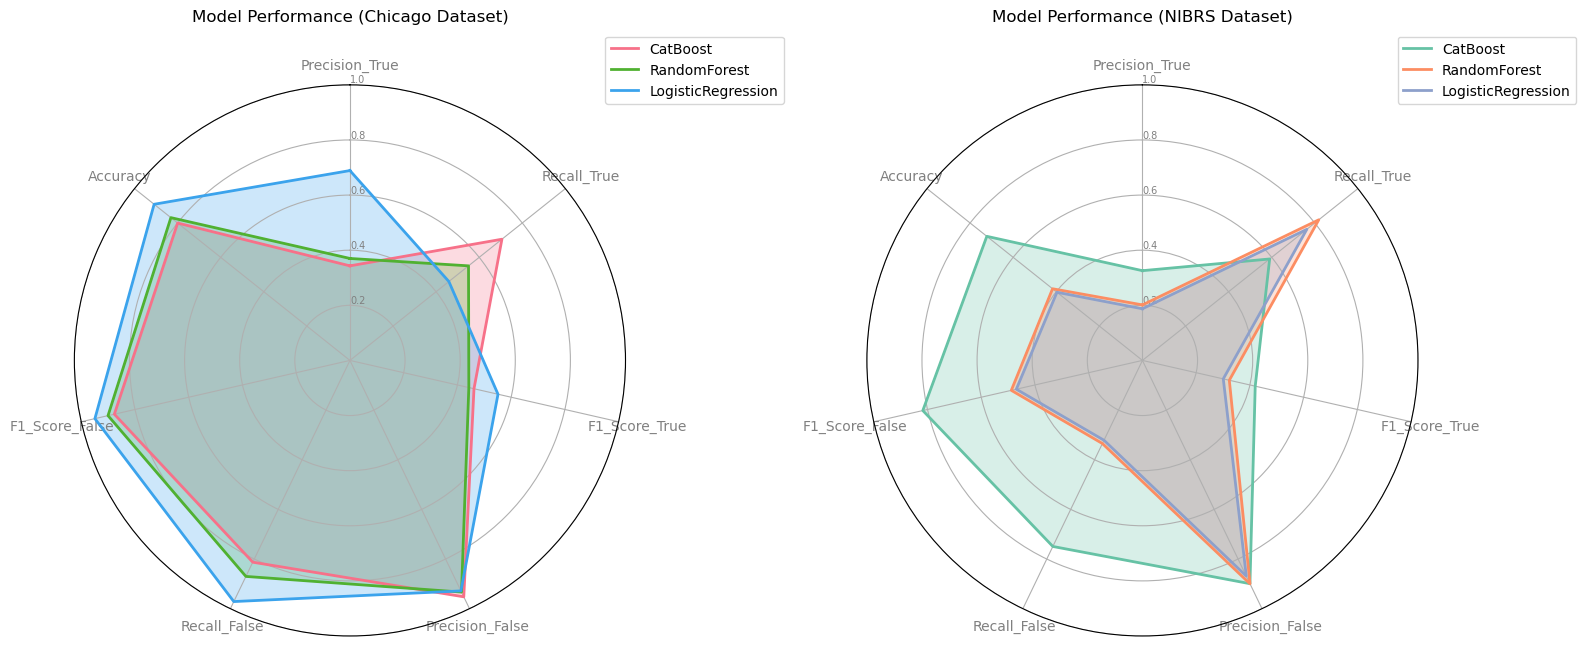

In [94]:
# Draw a radar chart for to compare some important metrics
metrics_dict_list = [chicago_metrics_dict, nibrs_metrics_dict]

plot_side_by_side_radar_charts(
    metrics_dict_list=metrics_dict_list,
    dataset_names=['Chicago Dataset', 'NIBRS Dataset'],
)

In [95]:
# calculate ROC AUC score
def calculate_roc(y_true, y_preds):
    roc_results = {}
    for model_name, y_pred in y_preds.items():
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_pred)
        roc_results[model_name] = {
            'fpr': fpr,
            'tpr': tpr,
            'auc': roc_auc
        }
    return roc_results

In [96]:
def plot_roc_curves(roc_results_list, dataset_names, color_palettes=[custom_palette_1, custom_palette_2], figsize=(12, 6)):
    """
    Plot ROC curves for multiple datasets.
    
    """
    
    num_datasets = len(roc_results_list)
    fig, axes = plt.subplots(1, num_datasets, figsize=figsize, sharey=True)
    
    # Ensure axes is iterable even if there's only one dataset
    if num_datasets == 1:
        axes = [axes]
    
    # Loop through each dataset and plot ROC curves
    for i, (roc_results, dataset_name, palette) in enumerate(zip(roc_results_list, dataset_names, color_palettes)):
        ax = axes[i]
        
        # Get colors from the specified palette
        if isinstance(palette, str): 
            colors = sns.color_palette(palette, n_colors=len(roc_results))
        else: 
            colors = palette
        
        # Plot ROC curve for each model
        for j, (model_name, roc_data) in enumerate(roc_results.items()):
            ax.plot(
                roc_data['fpr'], roc_data['tpr'],
                label=f"{model_name} (AUC = {roc_data['auc']:.2f})",
                color=colors[j]
            )
        
        # Add diagonal line and set limits
        ax.plot([0, 1], [0, 1], 'k--', linewidth=1)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate' if i == 0 else "")
        ax.set_title(f"ROC Curve ({dataset_name})")
        ax.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

The ROC curve measures a model’s ability to distinguish between the positive and negative classes across different probability thresholds.

It allows us to evaluate the performance of a binary classification model without being affected by a manually chosen threshold, making it a highly important evaluation tool in real-world applications.

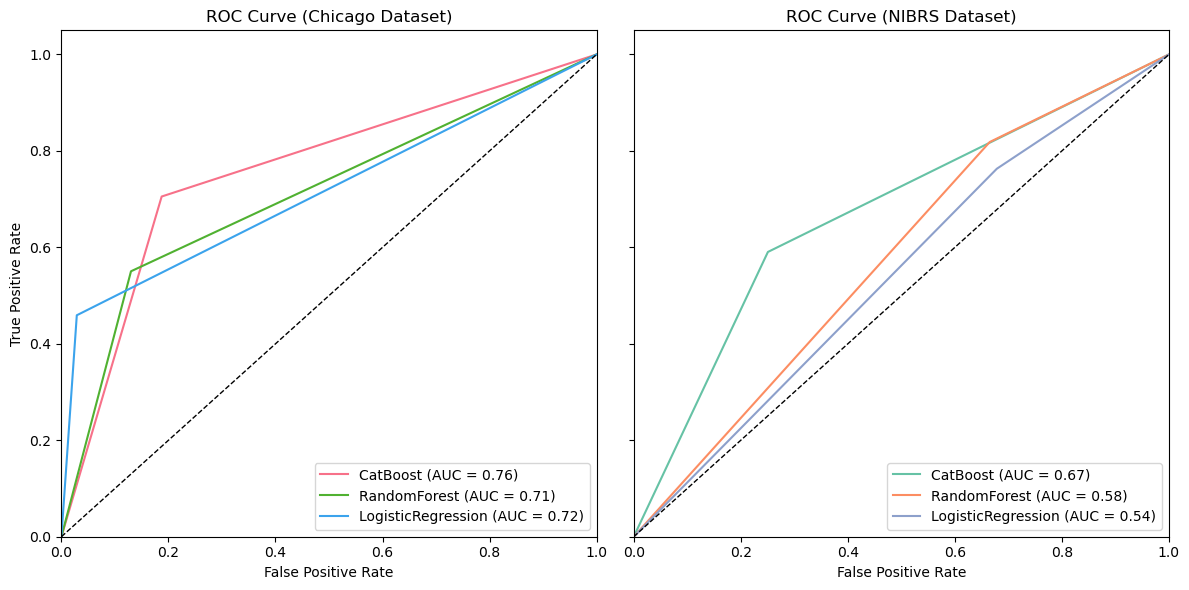

In [97]:
chicago_y_true = chicago_predictions["y_true"]
chicago_y_preds = {
    "CatBoost": chicago_predictions["CatBoost"],
    "RandomForest": chicago_predictions["RandomForest"],
    "LogisticRegression": chicago_predictions["LogisticRegression"]
}

nibrs_y_true = nibrs_predictions["y_true"]
nibrs_y_preds = {
    "CatBoost": nibrs_predictions["CatBoost"],
    "RandomForest": nibrs_predictions["RandomForest"],
    "LogisticRegression": nibrs_predictions["LogisticRegression"]
}

chicago_roc_results = calculate_roc(chicago_y_true, chicago_y_preds)
nibrs_roc_results = calculate_roc(nibrs_y_true, nibrs_y_preds)

plot_roc_curves(
    roc_results_list=[chicago_roc_results, nibrs_roc_results],
    dataset_names=["Chicago Dataset", "NIBRS Dataset"]
)

## Temporal Accuracy Measures

In [98]:
def evaluate_temporal_performance(df, group_col, y_true_col='y_true', model_cols=None):
    '''
    Groups the DataFrame by a specified column and evaluates model performance metrics.
    '''
    if model_cols is None:
        raise ValueError("No model columns provided for evaluation.")
    
    results = []
    
    for model_col in model_cols:
        grouped_perf = df.groupby(group_col).apply(
            lambda g: pd.Series({
                'model': model_col,
                'accuracy': accuracy_score(g[y_true_col], g[model_col]),
                'f1_score': f1_score(g[y_true_col], g[model_col], zero_division=0),
                'precision': precision_score(g[y_true_col], g[model_col], zero_division=0),
                'recall': recall_score(g[y_true_col], g[model_col], zero_division=0),
                'count': len(g)
            })
        ).reset_index()
        
        results.append(grouped_perf)
    
    grouped_perf_all = pd.concat(results, ignore_index=True)
    
    return grouped_perf_all

In [101]:
def plot_temporal_metrics_two_datasets(grouped_perf_list, group_col, dataset_names, metrics=None, figsize=(20, 10), xtick_rotation=0, color_palettes=["Set1", "Set2"]):
    """
    Plot temporal performance metrics for multiple models across two datasets
    """
    if metrics is None:
        metrics = ['accuracy', 'f1_score', 'precision', 'recall']
    
    # Ensure the number of datasets matches the number of dataset names
    if len(grouped_perf_list) != len(dataset_names):
        raise ValueError("The length of grouped_perf_list must match the length of dataset_names.")
    
    # Create subplots with 2 rows and len(metrics) columns
    fig, axes = plt.subplots(2, len(metrics), figsize=figsize, sharex=True)
    
    # Ensure axes is iterable even if there's only one metric
    if len(metrics) == 1:
        axes = np.expand_dims(axes, axis=1)
    
    # Loop through each dataset and plot metrics
    for row_idx, (grouped_perf, dataset_name) in enumerate(zip(grouped_perf_list, dataset_names)):
        # Ensure the metrics are valid
        valid_metrics = set(grouped_perf.columns) & set(metrics)
        if not valid_metrics:
            raise ValueError(f"No valid metrics found in the input DataFrame for {dataset_name}.")
        
        # Get the color palette for the current dataset
        palette = color_palettes[row_idx % len(color_palettes)]
        
        # Plot each metric for the current dataset
        for col_idx, metric in enumerate(valid_metrics):
            ax = axes[row_idx, col_idx]
            sns.lineplot(
                data=grouped_perf,
                x=group_col,
                y=metric,
                hue="model",
                ax=ax,
                marker="o",
                palette=palette  # Use a unique palette for each dataset
            )
            ax.set_title(f"{metric.capitalize()} by {group_col.capitalize()} ({dataset_name})")
            ax.set_xlabel(group_col.capitalize() if row_idx == 1 else "")
            ax.set_ylabel(metric.capitalize())
            ax.tick_params(axis='x', labelsize=8, rotation=xtick_rotation)
            ax.legend(title="Model" if col_idx == 0 else None)  # Only show legend title for the first column
    
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_binary_feature_metrics(grouped_perf_list, group_col, dataset_names, metrics=None, figsize=(20, 10), color_palettes=["Set1", "Set2"]):
    """
    Plot bar charts for performance metrics of binary features across multiple datasets.
    """
    if metrics is None:
        metrics = ['accuracy', 'f1_score', 'precision', 'recall']
    
    # Ensure the number of datasets matches the number of dataset names
    if len(grouped_perf_list) != len(dataset_names):
        raise ValueError("The length of grouped_perf_list must match the length of dataset_names.")
    
    # Create subplots with 2 rows and len(metrics) columns
    fig, axes = plt.subplots(2, len(metrics), figsize=figsize, sharex=True)
    
    # Ensure axes is iterable even if there's only one metric
    if len(metrics) == 1:
        axes = np.expand_dims(axes, axis=1)
    
    # Loop through each dataset and plot metrics
    for row_idx, (grouped_perf, dataset_name) in enumerate(zip(grouped_perf_list, dataset_names)):
        # Ensure the metrics are valid
        valid_metrics = set(grouped_perf.columns) & set(metrics)
        if not valid_metrics:
            raise ValueError(f"No valid metrics found in the input DataFrame for {dataset_name}.")
        
        # Get the color palette for the current dataset
        palette = color_palettes[row_idx % len(color_palettes)]
        
        # Plot each metric for the current dataset
        for col_idx, metric in enumerate(valid_metrics):
            ax = axes[row_idx, col_idx]
            sns.barplot(
                data=grouped_perf,
                x=group_col,
                y=metric,
                hue="model",
                ax=ax,
                palette=palette  # Use a unique palette for each dataset
            )
            ax.set_title(f"{metric.capitalize()} by {group_col.capitalize()} ({dataset_name})")
            ax.set_xlabel(f"{group_col.capitalize()} (0 or 1)" if row_idx == 1 else "", fontsize=10)
            ax.set_ylabel(metric.capitalize())
            ax.legend(title="Model" if col_idx == 0 else None)  # Only show legend title for the first column
    
    plt.tight_layout()
    plt.show()

### Evaluate Performance in Hour

In [103]:
grouped_perf_chicago = evaluate_temporal_performance(
    df=chicago_predictions,
    group_col='hour',
    y_true_col='y_true',
    model_cols=model_columns
)

print(grouped_perf_chicago)

    hour               model  accuracy  f1_score  precision    recall  count
0      0            CatBoost  0.758414  0.382445   0.250914  0.803807   7339
1      1            CatBoost  0.637646  0.366045   0.235476  0.821622   2906
2      2            CatBoost  0.638074  0.331015   0.210619  0.772727   2658
3      3            CatBoost  0.644191  0.270775   0.163657  0.783784   2195
4      4            CatBoost  0.678102  0.288243   0.178404  0.750000   1749
..   ...                 ...       ...       ...        ...       ...    ...
67    19  LogisticRegression  0.907038  0.638842   0.766871  0.547445   4561
68    20  LogisticRegression  0.898754  0.663212   0.775087  0.579560   4494
69    21  LogisticRegression  0.895038  0.635158   0.718574  0.569094   4192
70    22  LogisticRegression  0.896349  0.606589   0.719540  0.524288   3917
71    23  LogisticRegression  0.873271  0.523909   0.642857  0.442105   3614

[72 rows x 7 columns]


In [104]:
grouped_perf_nibrs = evaluate_temporal_performance(
    df=nibrs_predictions,
    group_col='hour',
    y_true_col='y_true',
    model_cols=model_columns
)

print(grouped_perf_nibrs)

    hour               model  accuracy  f1_score  precision    recall  count
0      0            CatBoost  0.720658  0.480246   0.351721  0.756793  39278
1      1            CatBoost  0.628112  0.510123   0.372629  0.808417  17957
2      2            CatBoost  0.640627  0.488291   0.352762  0.792929  15566
3      3            CatBoost  0.656697  0.458754   0.328166  0.761963  12805
4      4            CatBoost  0.679351  0.420391   0.296406  0.722689  10354
..   ...                 ...       ...       ...        ...       ...    ...
67    19  LogisticRegression  0.404712  0.328893   0.209477  0.764986  28608
68    20  LogisticRegression  0.395663  0.340556   0.216665  0.795340  27344
69    21  LogisticRegression  0.390594  0.348765   0.222378  0.807970  25346
70    22  LogisticRegression  0.385756  0.362719   0.231332  0.839553  24067
71    23  LogisticRegression  0.388738  0.380900   0.245687  0.847097  22038

[72 rows x 7 columns]


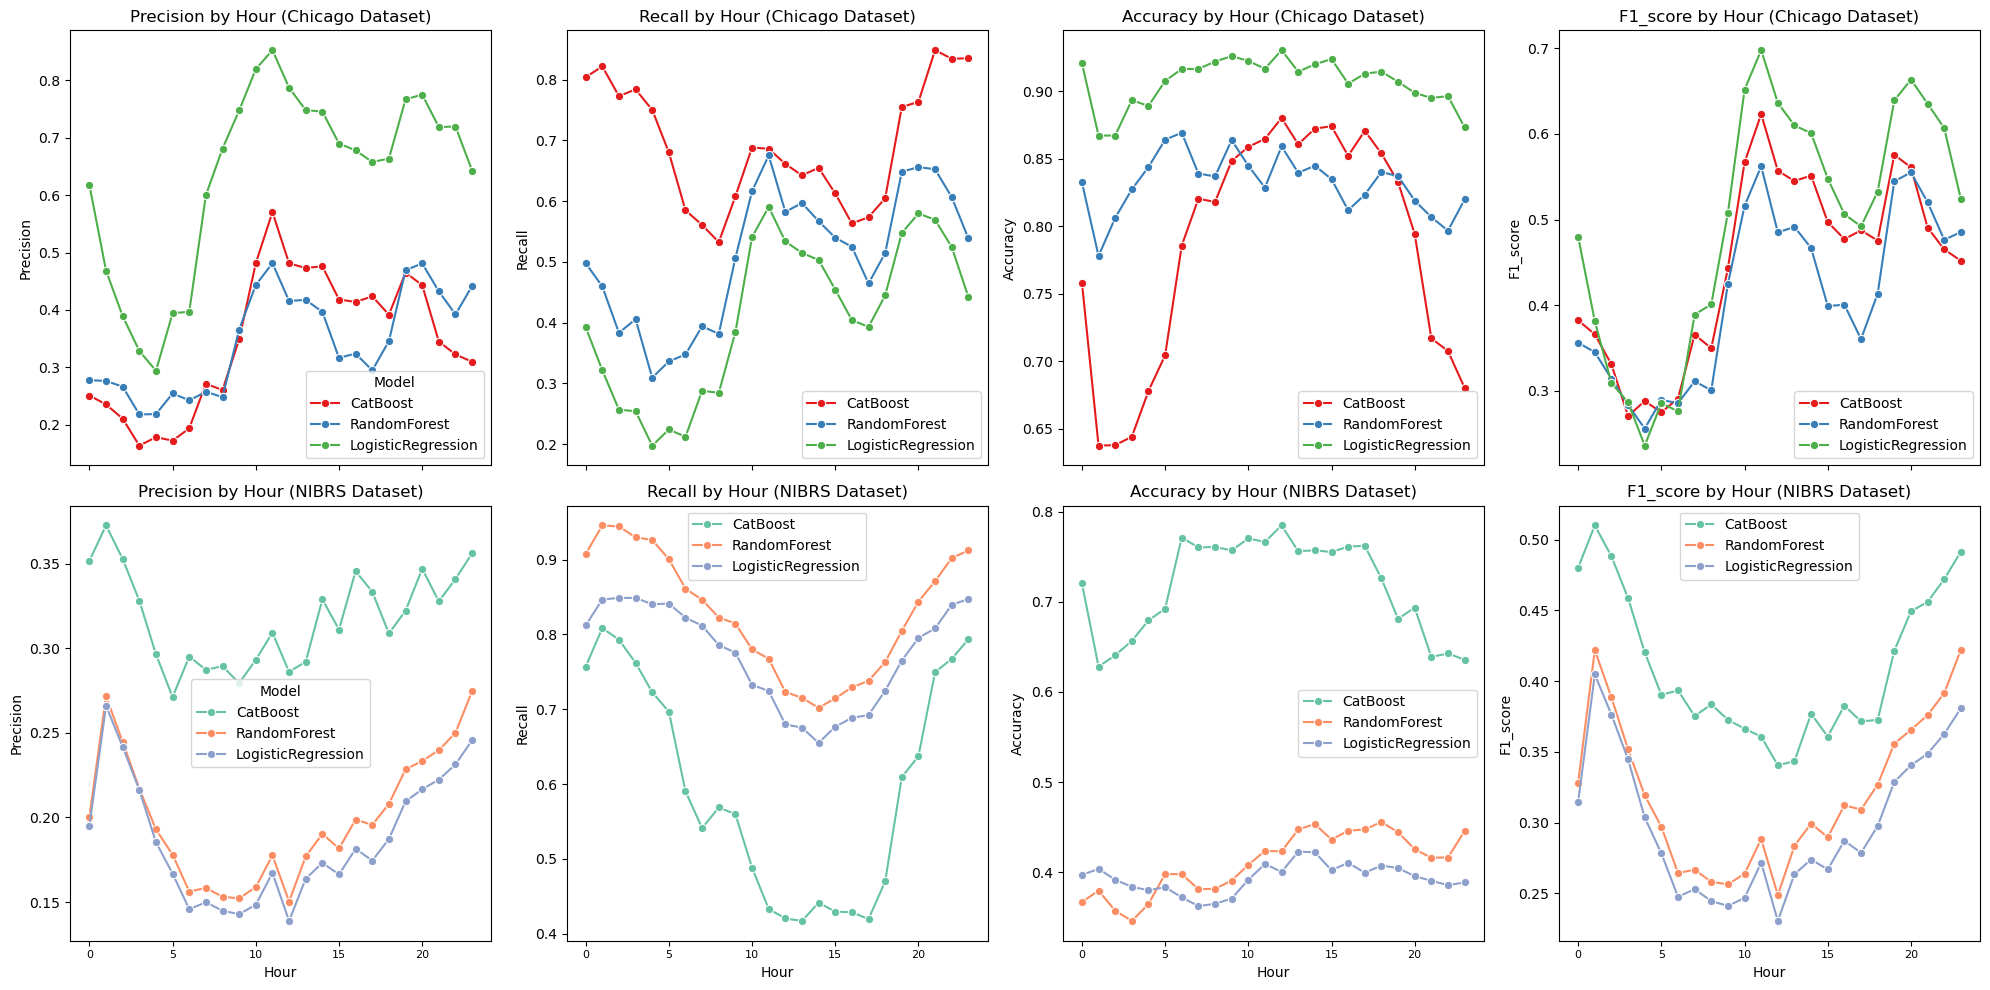

In [105]:
plot_temporal_metrics_two_datasets(
    grouped_perf_list=[grouped_perf_chicago, grouped_perf_nibrs],
    group_col='hour',
    dataset_names=['Chicago Dataset', 'NIBRS Dataset'],
    metrics=['accuracy', 'f1_score', 'precision', 'recall'],
    figsize=(20, 10)
)

### Evaluate Performance in Month

In [106]:
month_perf_chicago = evaluate_temporal_performance(
    df=chicago_predictions,
    group_col='month',
    y_true_col='y_true',
    model_cols=model_columns
)

print(month_perf_chicago)

    month               model  accuracy  f1_score  precision    recall  count
0       1            CatBoost  0.790343  0.464444   0.342214  0.722500   6358
1       2            CatBoost  0.783235  0.524219   0.403488  0.748049   5619
2       3            CatBoost  0.789481  0.518396   0.396351  0.749042   6902
3       4            CatBoost  0.771632  0.466296   0.340955  0.737363   6726
4       5            CatBoost  0.770556  0.478957   0.356418  0.729901   7662
5       6            CatBoost  0.788061  0.445174   0.325336  0.704782   7974
6       7            CatBoost  0.798176  0.434783   0.319473  0.680346   8116
7       8            CatBoost  0.804358  0.423963   0.309204  0.674183   8306
8       9            CatBoost  0.810981  0.443047   0.324463  0.698238   8433
9      10            CatBoost  0.821258  0.439256   0.325054  0.677165   8599
10     11            CatBoost  0.832008  0.462256   0.351386  0.675341   7548
11     12            CatBoost  0.822133  0.436224   0.329057  0.

In [107]:
month_perf_nibrs = evaluate_temporal_performance(
    df=nibrs_predictions,
    group_col='month',
    y_true_col='y_true',
    model_cols=model_columns
)

print(month_perf_nibrs)

    month               model  accuracy  f1_score  precision    recall  count
0       1            CatBoost  0.704204  0.419433   0.313813  0.632218  45288
1       2            CatBoost  0.699462  0.430436   0.323688  0.642239  39203
2       3            CatBoost  0.710649  0.439721   0.333445  0.645437  43912
3       4            CatBoost  0.699215  0.425913   0.322393  0.627357  44723
4       5            CatBoost  0.703572  0.424829   0.322708  0.621503  49108
5       6            CatBoost  0.734074  0.424311   0.334986  0.578597  49653
6       7            CatBoost  0.738265  0.424201   0.336367  0.574115  50979
7       8            CatBoost  0.739018  0.418617   0.333562  0.561894  51789
8       9            CatBoost  0.725448  0.401318   0.316896  0.547054  48326
9      10            CatBoost  0.739251  0.399851   0.314977  0.547338  49584
10     11            CatBoost  0.736008  0.413387   0.329068  0.555803  45615
11     12            CatBoost  0.728324  0.413098   0.326722  0.

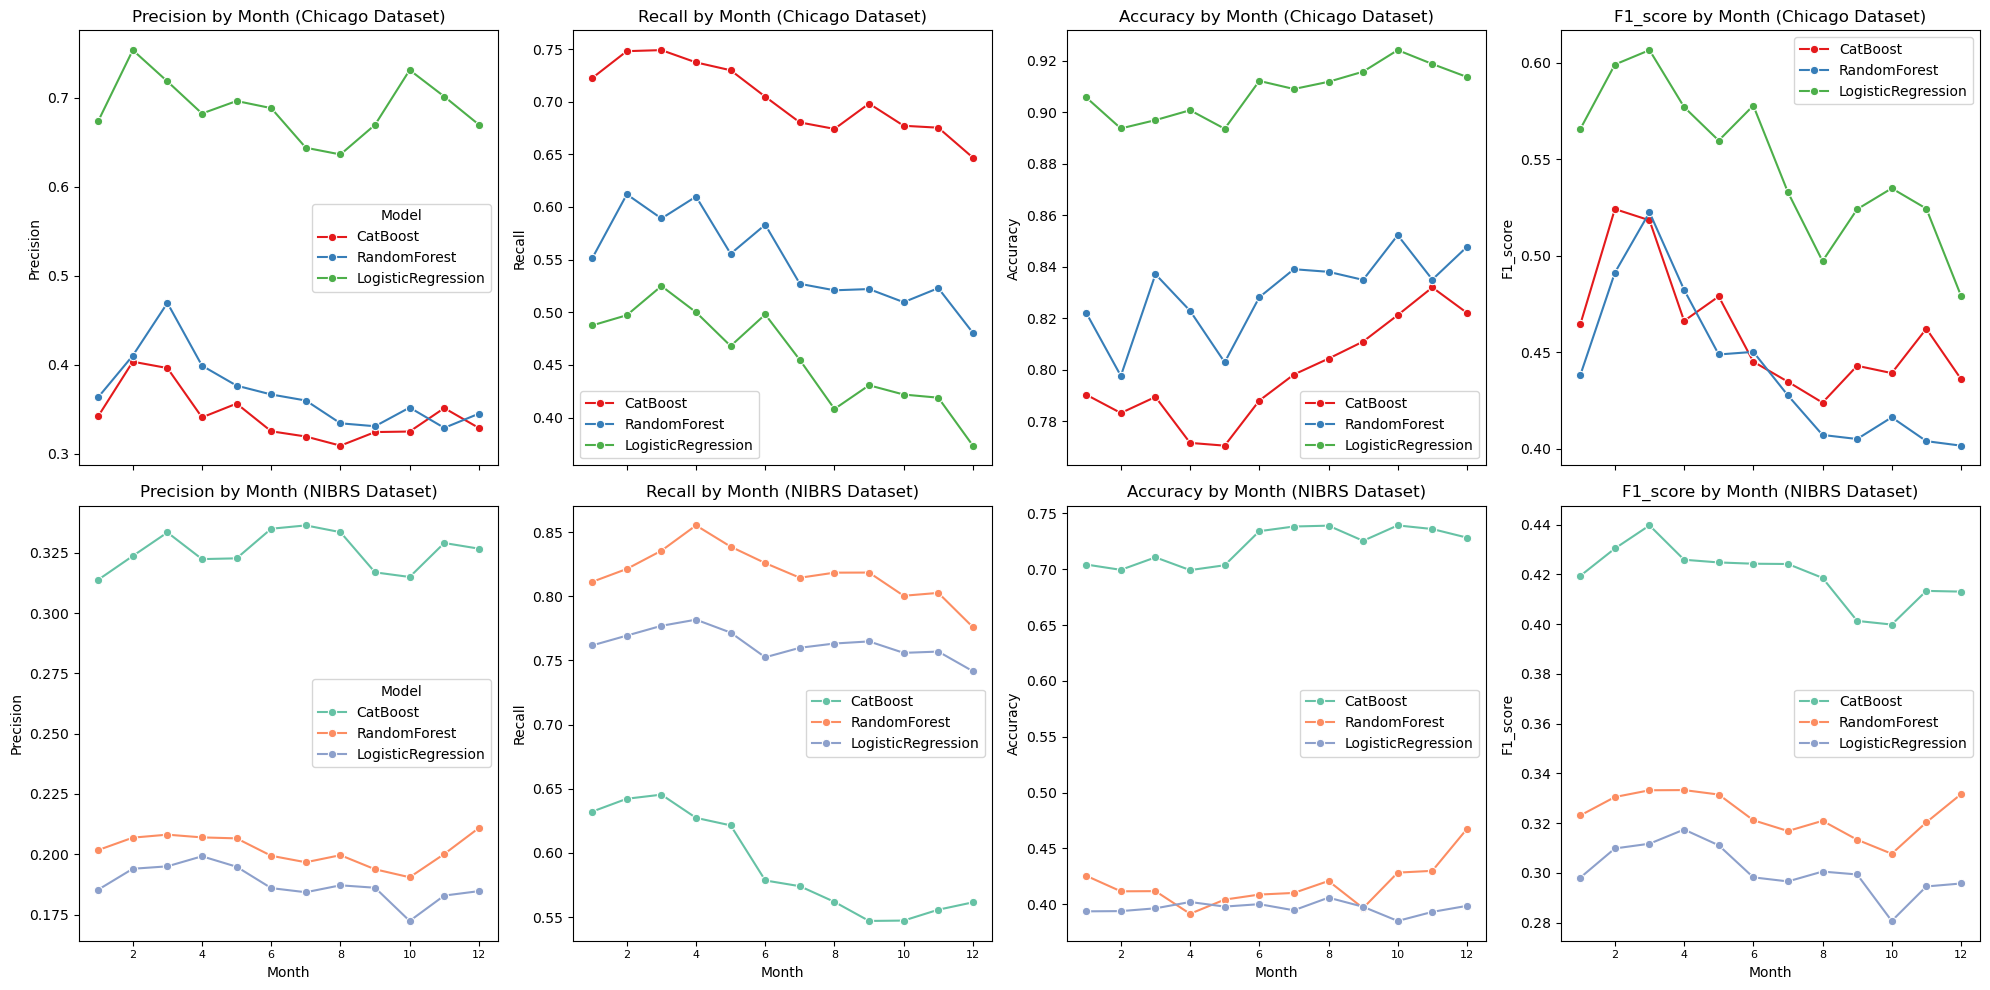

In [108]:
plot_temporal_metrics_two_datasets(
    grouped_perf_list=[month_perf_chicago, month_perf_nibrs],
    group_col='month',
    dataset_names=['Chicago Dataset', 'NIBRS Dataset'],
    metrics=['accuracy', 'f1_score', 'precision', 'recall'],
    figsize=(20, 10)
)

### Evaluate Performance in Weekend

In [109]:
weekend_perf_chicago = evaluate_temporal_performance(
    df=chicago_predictions,
    group_col='is_weekend',
    y_true_col='y_true',
    model_cols=model_columns
)
print(weekend_perf_chicago)

   is_weekend               model  accuracy  f1_score  precision    recall  \
0           0            CatBoost  0.820248  0.480930   0.368319  0.692727   
1           1            CatBoost  0.748001  0.423756   0.297595  0.735604   
2           0        RandomForest  0.832847  0.447324   0.371198  0.562727   
3           1        RandomForest  0.826502  0.430710   0.367067  0.521053   
4           0  LogisticRegression  0.912965  0.564283   0.708538  0.468831   
5           1  LogisticRegression  0.898530  0.519926   0.643379  0.436223   

   count  
0  64055  
1  25643  
2  64055  
3  25643  
4  64055  
5  25643  


In [110]:
weekend_perf_nibrs = evaluate_temporal_performance(
    df=nibrs_predictions,
    group_col='is_weekend',
    y_true_col='y_true',
    model_cols=model_columns
)
print(weekend_perf_nibrs)

   is_weekend               model  accuracy  f1_score  precision    recall  \
0           0            CatBoost  0.743617  0.418232   0.333582  0.560452   
1           1            CatBoost  0.668687  0.422838   0.311616  0.657520   
2           0        RandomForest  0.410101  0.312533   0.193311  0.815465   
3           1        RandomForest  0.434678  0.350146   0.222223  0.825132   
4           0  LogisticRegression  0.397426  0.292095   0.181015  0.756033   
5           1  LogisticRegression  0.394900  0.322021   0.202990  0.778554   

    count  
0  402457  
1  160519  
2  402457  
3  160519  
4  402457  
5  160519  


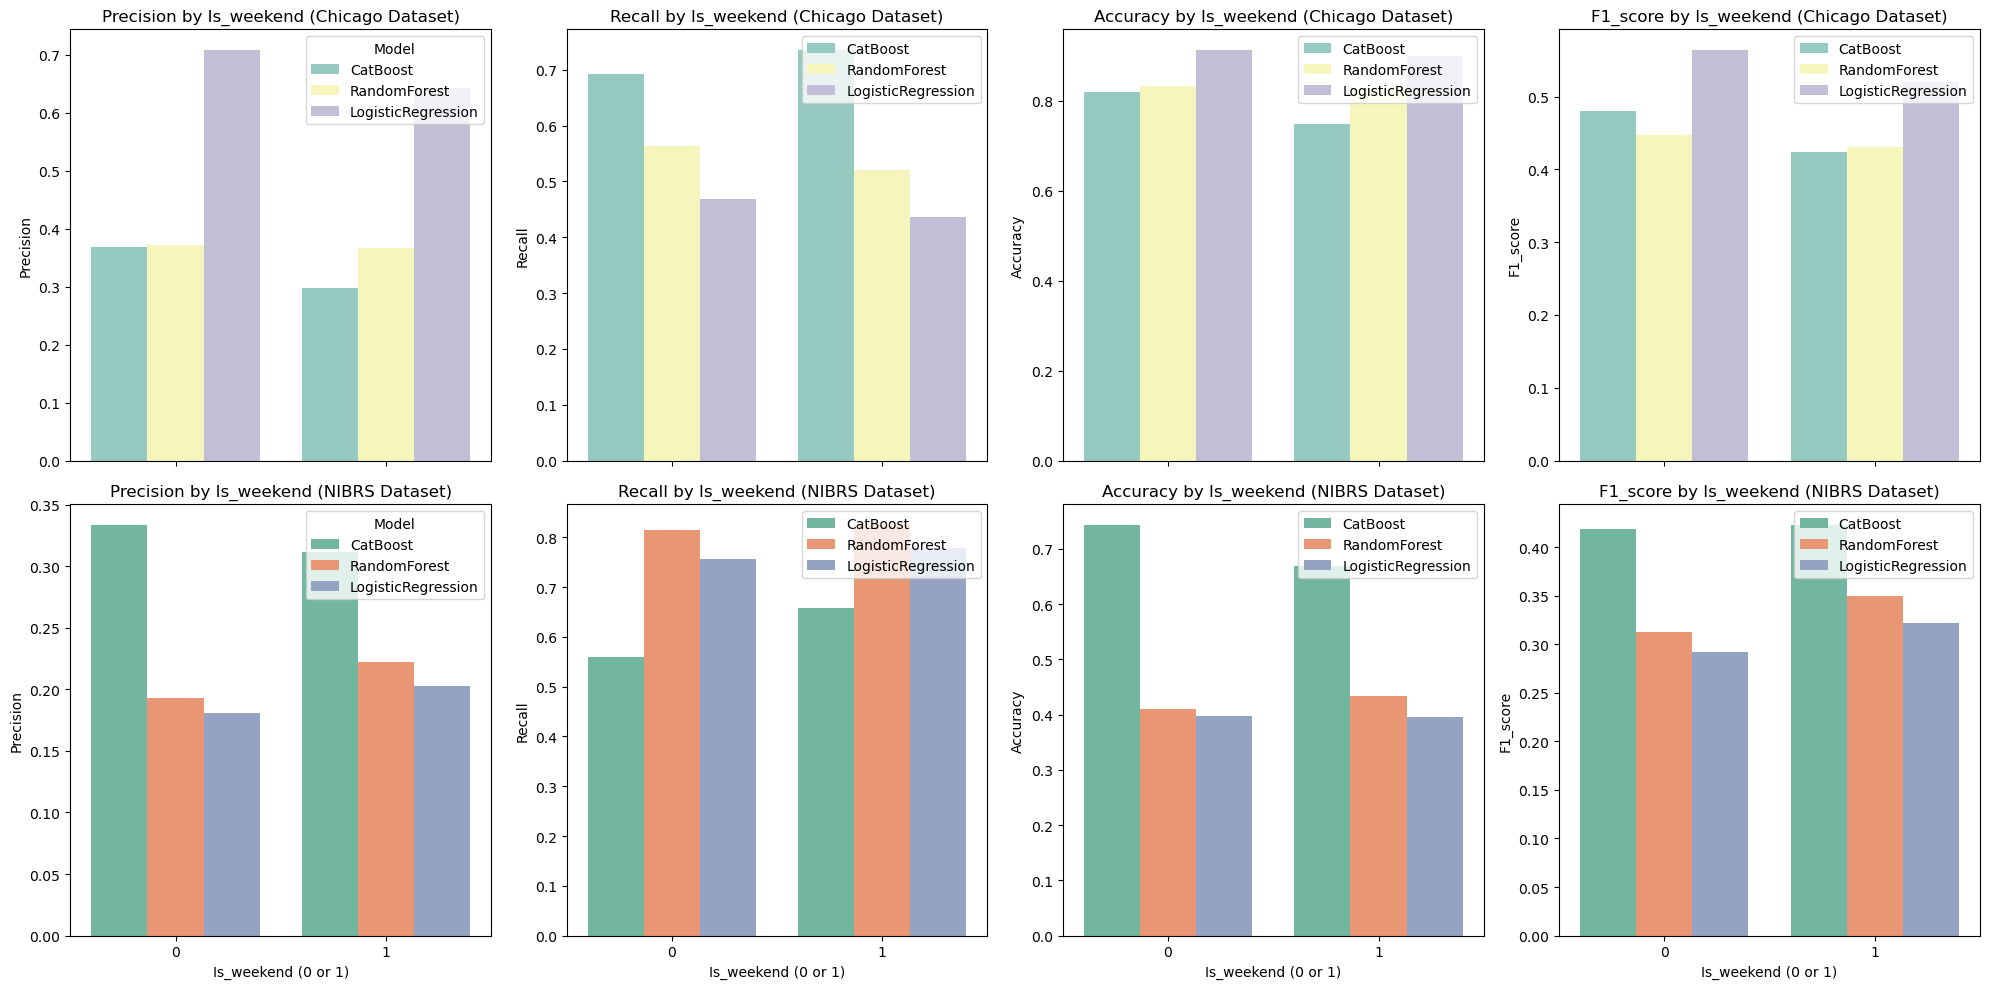

In [116]:
plot_binary_feature_metrics(
    grouped_perf_list=[weekend_perf_chicago, weekend_perf_nibrs],
    group_col='is_weekend',
    dataset_names=['Chicago Dataset', 'NIBRS Dataset'],
    metrics=['accuracy', 'f1_score', 'precision', 'recall'],
    figsize=(20, 10),
    color_palettes=["Set3", "Set2"]
)

### Evaluate performance in is_holiday

In [112]:
holiday_perf_chicago = evaluate_temporal_performance(
    df=chicago_predictions,
    group_col='is_holiday',
    y_true_col='y_true',
    model_cols=model_columns
)
print(holiday_perf_chicago)

   is_holiday               model  accuracy  f1_score  precision    recall  \
0           0            CatBoost  0.800102  0.460628   0.342359  0.703739   
1           1            CatBoost  0.787026  0.486150   0.361483  0.742072   
2           0        RandomForest  0.830526  0.440813   0.367471  0.550732   
3           1        RandomForest  0.843571  0.485364   0.438567  0.543340   
4           0  LogisticRegression  0.908982  0.549463   0.687500  0.457588   
5           1  LogisticRegression  0.905281  0.586466   0.720000  0.494715   

   count  
0  86214  
1   3484  
2  86214  
3   3484  
4  86214  
5   3484  


In [113]:
holiday_perf_nibrs = evaluate_temporal_performance(
    df=nibrs_predictions,
    group_col='is_holiday',
    y_true_col='y_true',
    model_cols=model_columns
)
print(holiday_perf_nibrs)

   is_holiday               model  accuracy  f1_score  precision    recall  \
0           0            CatBoost  0.722415  0.419784   0.325738  0.590181   
1           1            CatBoost  0.717713  0.420420   0.324012  0.598498   
2           0        RandomForest  0.415536  0.322931   0.201103  0.819194   
3           1        RandomForest  0.461009  0.336201   0.212969  0.797898   
4           0  LogisticRegression  0.397242  0.300789   0.187377  0.761990   
5           1  LogisticRegression  0.381743  0.304456   0.188506  0.790991   

    count  
0  543510  
1   19466  
2  543510  
3   19466  
4  543510  
5   19466  


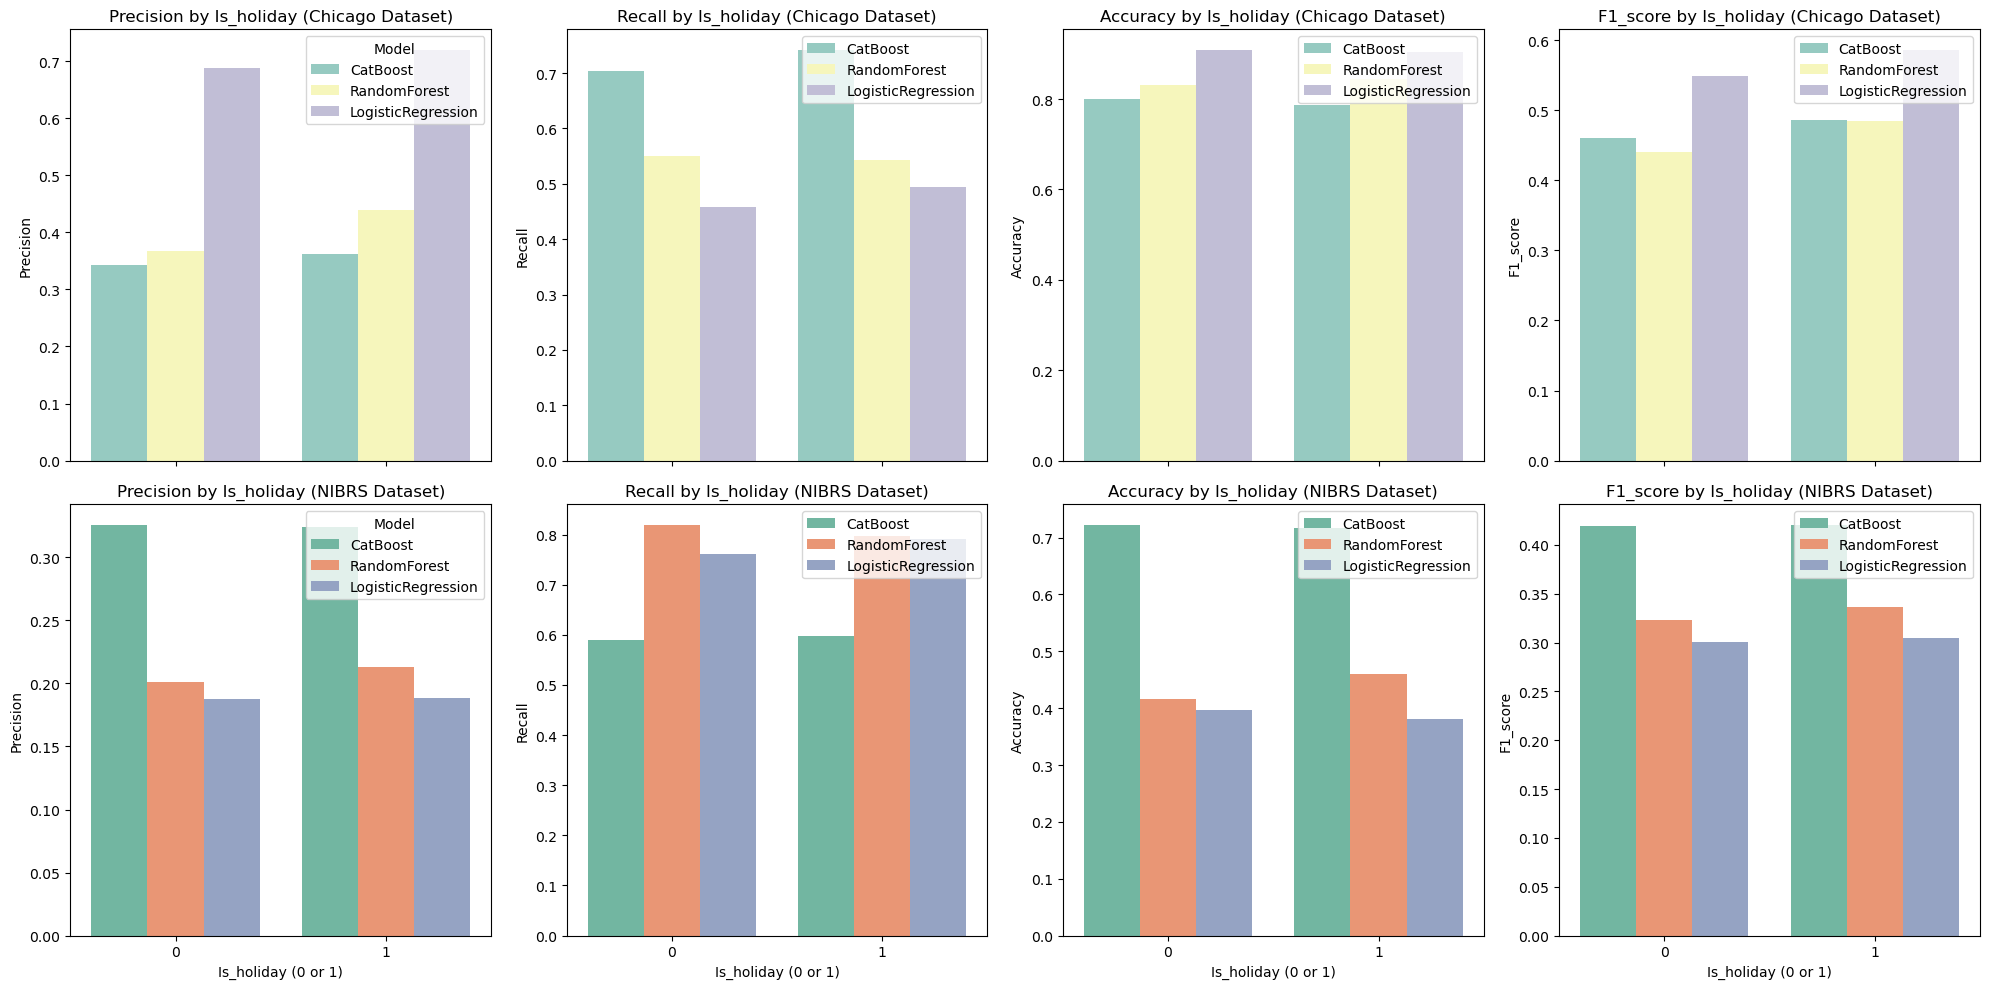

In [117]:
plot_binary_feature_metrics(
    grouped_perf_list=[holiday_perf_chicago, holiday_perf_nibrs],
    group_col='is_holiday',
    dataset_names=['Chicago Dataset', 'NIBRS Dataset'],
    metrics=['accuracy', 'f1_score', 'precision', 'recall'],
    figsize=(20, 10),
    color_palettes=["Set3", "Set2"]
)

## Spatial Accuracy Evaluation

In [118]:
unified_location_mapping = {
    "Residence": 1,
    "Street/Outdoor": 2,
    "Transportation Hub": 3,
    "Retail/Commercial": 4,
    "Entertainment": 5,
    "Government/Public": 6,
    "Medical Facility": 7,
    "Workplace/Office": 8,
    "Parking Lot": 9,
    "Unknown/Other": 10
}
reverse_location_mapping = {v: k for k, v in unified_location_mapping.items()}

In [119]:
chicago_predictions['location_name'] = chicago_predictions['UNIFIED_LOCATION_CODE'].map(reverse_location_mapping)
nibrs_predictions['location_name'] = nibrs_predictions['UNIFIED_LOCATION_CODE'].map(reverse_location_mapping)

In [120]:
spatial_perf_chicago = evaluate_temporal_performance(
    df=chicago_predictions,
    group_col='location_name',
    y_true_col='y_true',
    model_cols=model_columns
)
print(spatial_perf_chicago)

         location_name               model  accuracy  f1_score  precision  \
0        Entertainment            CatBoost  0.685155  0.443804   0.300781   
1    Government/Public            CatBoost  0.742138  0.724832   0.586957   
2     Medical Facility            CatBoost  0.765267  0.509960   0.402516   
3          Parking Lot            CatBoost  0.913113  0.536503   0.457971   
4            Residence            CatBoost  0.693166  0.270454   0.170199   
5    Retail/Commercial            CatBoost  0.450273  0.355404   0.222222   
6       Street/Outdoor            CatBoost  0.841701  0.628003   0.513745   
7   Transportation Hub            CatBoost  0.617021  0.378289   0.253863   
8        Unknown/Other            CatBoost  0.848637  0.395924   0.321279   
9     Workplace/Office            CatBoost  0.881218  0.285714   0.231884   
10       Entertainment        RandomForest  0.827080  0.411111   0.415730   
11   Government/Public        RandomForest  0.905660  0.862385   0.903846   

In [121]:
spatial_perf_nibrs = evaluate_temporal_performance(
    df=chicago_predictions,
    group_col='location_name',
    y_true_col='y_true',
    model_cols=model_columns
)
print(spatial_perf_nibrs)

         location_name               model  accuracy  f1_score  precision  \
0        Entertainment            CatBoost  0.685155  0.443804   0.300781   
1    Government/Public            CatBoost  0.742138  0.724832   0.586957   
2     Medical Facility            CatBoost  0.765267  0.509960   0.402516   
3          Parking Lot            CatBoost  0.913113  0.536503   0.457971   
4            Residence            CatBoost  0.693166  0.270454   0.170199   
5    Retail/Commercial            CatBoost  0.450273  0.355404   0.222222   
6       Street/Outdoor            CatBoost  0.841701  0.628003   0.513745   
7   Transportation Hub            CatBoost  0.617021  0.378289   0.253863   
8        Unknown/Other            CatBoost  0.848637  0.395924   0.321279   
9     Workplace/Office            CatBoost  0.881218  0.285714   0.231884   
10       Entertainment        RandomForest  0.827080  0.411111   0.415730   
11   Government/Public        RandomForest  0.905660  0.862385   0.903846   

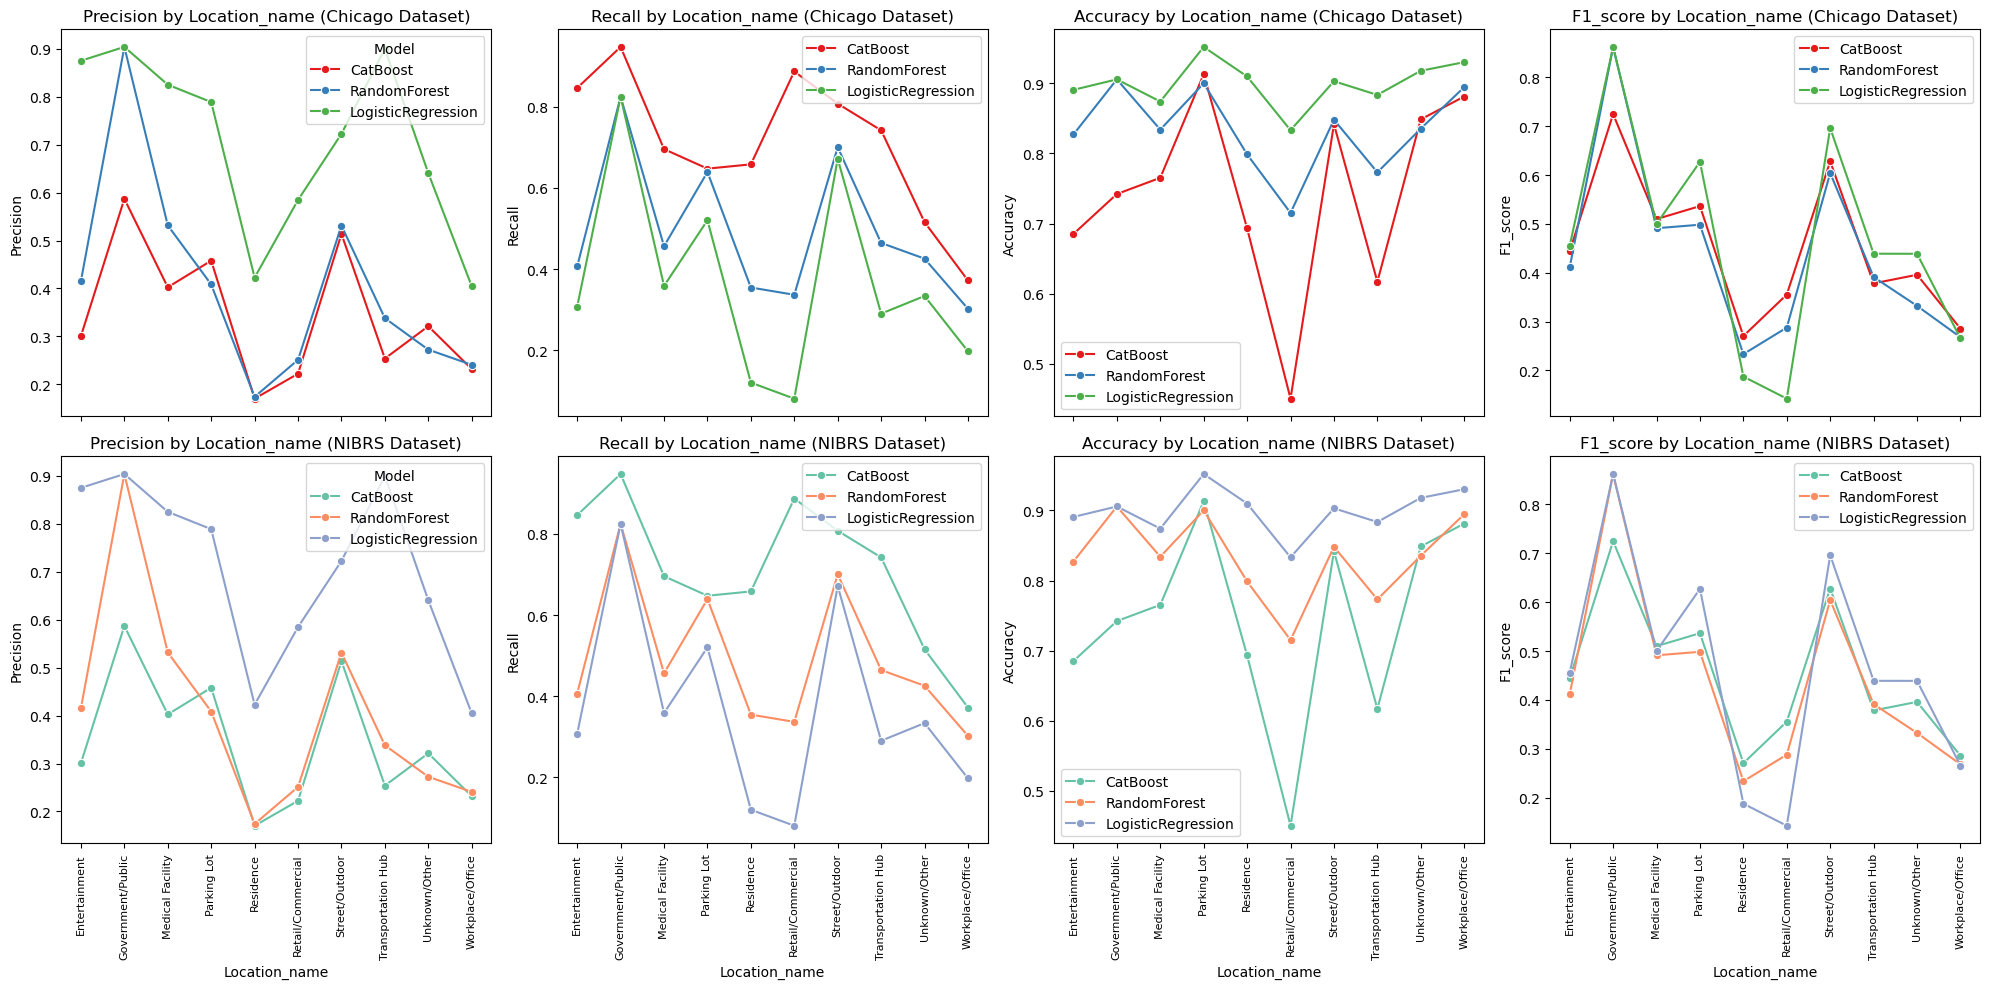

In [122]:
plot_temporal_metrics_two_datasets(
    grouped_perf_list=[spatial_perf_chicago, spatial_perf_nibrs],
    group_col='location_name',
    dataset_names=['Chicago Dataset', 'NIBRS Dataset'],
    metrics=['accuracy', 'f1_score', 'precision', 'recall'],
    figsize=(20, 10),
    xtick_rotation=90
)